In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_acc_0 = pd.read_csv('data/accelerometer.csv')
df_acc_1 = pd.read_csv('data/accelerometer1.csv')
df_acc_2 = pd.read_csv('data/accelerometer2.csv')

df_mag_0 = pd.read_csv('data/magnetometer.csv')
df_mag_1 = pd.read_csv('data/magnetometer1.csv')
df_mag_2 = pd.read_csv('data/magnetometer2.csv')

df_0 = df_mag_0.join(df_acc_0[['ax', 'ay', 'az']])
df_1 = df_mag_1.join(df_acc_1[['ax', 'ay', 'az']])
df_2 = df_mag_2.join(df_acc_2[['ax', 'ay', 'az']])

In [3]:
columns2drop = ['meta_info', 'type_sensor']

rename_dict = {
    'x': 'Mag_x',
    'y': 'Mag_y',
    'z': 'Mag_z',
    'ax': 'Acc_x',
    'ay': 'Acc_y',
    'az': 'Acc_z',
}

In [4]:
for df in [df_0, df_1, df_2]:
    df.drop(columns2drop, axis=1, inplace=True, errors='ignore')
    df.rename(columns=rename_dict, inplace=True)

In [5]:
mask = df_2['people_id'] == 'noone'
df2analyse = df_2.loc[mask, :]

In [6]:
def plot_measurements(df2analyse):
    fig, ax = plt.subplots(2, 3)
    fig.set_figheight(10)
    fig.set_figwidth(20)

    for n_row, sensor_type in enumerate(['Mag', 'Acc']):
        for n_col, coord in enumerate([['x', 'y'], ['x', 'z'], ['y', 'z']]):
            coord_name_1 = sensor_type + '_' + coord[0]
            coord_name_2 = sensor_type + '_' + coord[1]

            first_coord = df2analyse[coord_name_1].values
            second_coord = df2analyse[coord_name_2].values

            ax[n_row, n_col].scatter(first_coord, second_coord, alpha=0.2, s=7)
    #         ax[n_row, n_col].heat2d(first_coord, second_coord)
            title = sensor_type + ' ' + ', '.join(coord)
            ax[n_row, n_col].set_title(title)

In [11]:
coord_names = list(rename_dict.values())
mask_noone = df_2['people_id'] == 'noone'
df_noone = df_2.loc[mask_noone, :]

means_noone = df_noone.loc[:, coord_names].mean(axis=0)
stds_noone = df_noone.loc[:, coord_names].std(axis=0)

In [15]:
means_noone.name = 'mean'
stds_noone.name = 'std'

In [16]:
means_stds = pd.DataFrame([means_noone, stds_noone]).T

In [48]:
means_stds

,mean,std
Mag_x,-32.376667,26.298773
Mag_y,-9146.816667,18.069042
Mag_z,3621.010000,34.732618
Acc_x,1590.471111,23.019077
Acc_y,854.364444,25.623102
Acc_z,16789.902222,27.920262


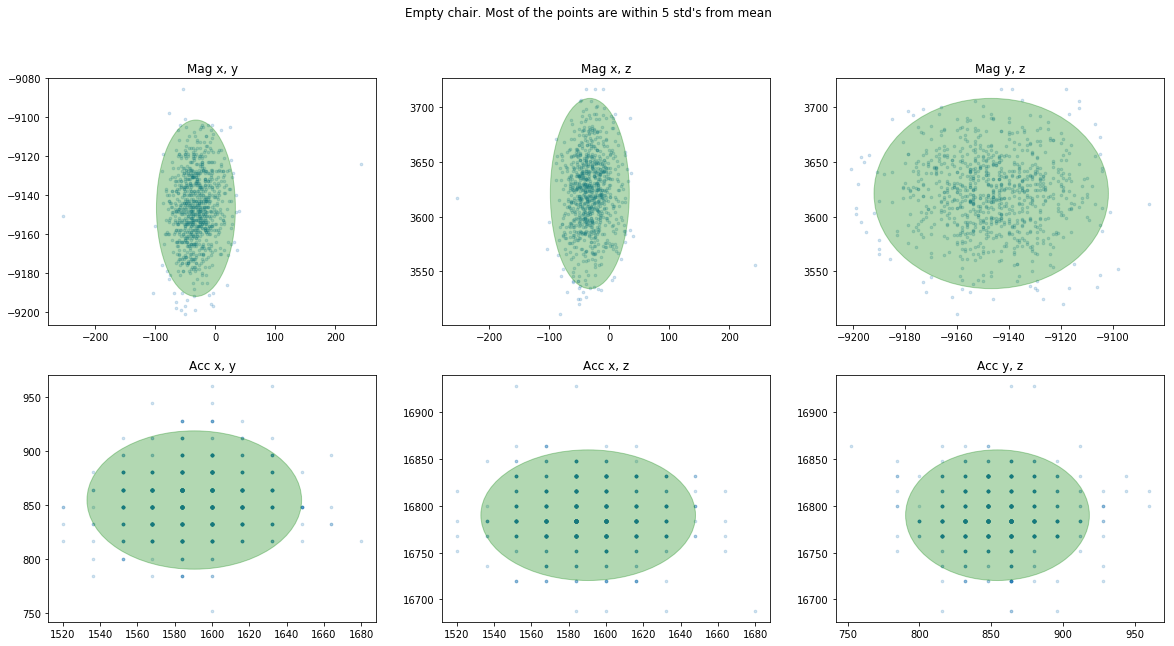

In [47]:
fig, ax = plt.subplots(2, 3)
fig.set_figheight(10)
fig.set_figwidth(20)
n_stds = 5

for n_row, sensor_type in enumerate(['Mag', 'Acc']):
    for n_col, coord in enumerate([['x', 'y'], ['x', 'z'], ['y', 'z']]):
        coord_name_1 = sensor_type + '_' + coord[0]
        coord_name_2 = sensor_type + '_' + coord[1]

        first_coord = df2analyse[coord_name_1].values
        second_coord = df2analyse[coord_name_2].values

        ax[n_row, n_col].scatter(first_coord, second_coord, alpha=0.2, s=7)
        
        errors_ellipse = Ellipse(
            xy=means_stds.loc[[coord_name_1, coord_name_2], 'mean'].values,
            width=n_stds*means_stds.loc[coord_name_1, 'std'],
            height=n_stds*means_stds.loc[coord_name_2, 'std'],
            alpha=0.3,
            color='green',
        )
        ax[n_row, n_col].add_artist(errors_ellipse)
        
#         ax[n_row, n_col].heat2d(first_coord, second_coord)
        title = sensor_type + ' ' + ', '.join(coord)
        ax[n_row, n_col].set_title(title)

fig.suptitle('Empty chair. Most of the points are within 5 std\'s from mean');
plt.savefig('pic/empty_chair.png')